In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import cleaned_product_review.csv

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ITB241 NLP/cleaned_product_review.csv', index_col=[0])
df.tail()

,user_id,stars,reviews,sent_review,words_review,bigram_tokens,freq_word,freq_bigram
537,A398T38COTS30K,5,this is my favorite kcup flavor i like my cof...,['this is my favorite kcup flavor i like my c...,"[['favorit', 'kcup', 'flavor', 'like', 'coffe'...","[['favorit_kcup', 'kcup_flavor', 'flavor_like'...","[{'favorit': 1, 'kcup': 1, 'flavor': 1, 'like'...","[{'favorit_kcup': 1, 'kcup_flavor': 1, 'flavor..."
538,A1B410YK9O18XZ,5,if you are looking for the taste of french van...,['if you are looking for the taste of french v...,"[['look', 'tast', 'french', 'vanilla', 'cappuc...","[['look_tast', 'tast_french', 'french_vanilla'...","[{'look': 2, 'tast': 1, 'french': 1, 'vanilla'...","[{'look_tast': 1, 'tast_french': 1, 'french_va..."
539,A1W85A81467TCW,5,i have purchased and used boxes of the hazeln...,['i have purchased and used boxes of the haze...,"[['purchas', 'hazelnut', 'cappuccino', 'look',...","[['purchas_use', 'use_box', 'box_hazelnut', 'h...","[{'purchas': 1, 'hazelnut': 1, 'cappuccino': 1...","[{'purchas_use': 1, 'use_box': 1, 'box_hazelnu..."
540,A103FOM06QPAX8,5,yummy great tasting and very convenient only ...,['yummy great tasting and very convenient onl...,"[['yummi', 'great', 'tast', 'conveni', 'drawba...","[['yummi_great', 'great_tast', 'tast_conveni',...","[{'yummi': 1, 'great': 1, 'tast': 1, 'conveni'...","[{'yummi_great': 1, 'great_tast': 1, 'tast_con..."
541,A1V5V04WIYLT8Q,4,for an enjoyable change from a coffee routine ...,['for an enjoyable change from a coffee routin...,"[['enjoy', 'chang', 'coffe', 'routin', 'think'...","[['enjoy_chang', 'chang_coffe', 'coffe_routin'...","[{'enjoy': 2, 'chang': 1, 'coffe': 1, 'routin'...","[{'enjoy_chang': 1, 'chang_coffe': 1, 'coffe_r..."


Remove 3 star reviews

In [ ]:
print(df.shape)

# drop rows with 3 star reviews
df = df.loc[df["stars"] != 3 ]

# reset index
df.index = range(len(df.index))

df.shape

(542, 8)


(514, 8)

Create new column, sentiment

In [ ]:
stars = list(df['stars'])
print(len(stars))

514


In [ ]:
df['sentiment'] = ''
stars = list(df['stars'])

for i, item in enumerate(stars):
  if item ==1 or item ==2:
    df['sentiment'][i] = 'negative'
  else:
    df['sentiment'][i] = 'positive'


<ipython-input-33-6227fcd78175>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i] = 'negative'
<ipython-input-33-6227fcd78175>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i] = 'positive'


Drop other columns

In [ ]:
# use only the necessary columns
df = df[['user_id', 'reviews', 'sentiment']]
df.tail()

,user_id,reviews,sentiment
509,A398T38COTS30K,this is my favorite kcup flavor i like my cof...,positive
510,A1B410YK9O18XZ,if you are looking for the taste of french van...,positive
511,A1W85A81467TCW,i have purchased and used boxes of the hazeln...,positive
512,A103FOM06QPAX8,yummy great tasting and very convenient only ...,positive
513,A1V5V04WIYLT8Q,for an enjoyable change from a coffee routine ...,positive


----
Distributon of sentiments

In [ ]:
# count sentiment column

sentcol = list(df['sentiment'])
positive = sentcol.count('positive')
negative = sentcol.count('negative')

print('number of positive reviews is', positive, 
      '\nnumber of negative reviews is', negative)

def percentage(s):
  return s/len(sentcol)*100

print('\nPercentage of positive reviews is', "{:.2f}%".format(percentage(positive)), 
      '\nPercentage of positive reviews is', "{:.2f}%".format(percentage(negative)))

number of positive reviews is 373 
number of negative reviews is 141

Percentage of positive reviews is 72.57% 
Percentage of positive reviews is 27.43%


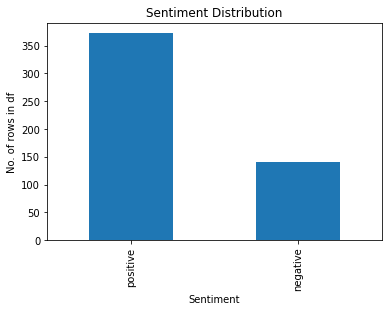

In [ ]:
import matplotlib.pyplot as plt

# Plotting the Sentiment distribution
plt.figure()
pd.value_counts(df['sentiment']).plot.bar(title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

The analysis of distribution of sentiments show that the number of positive reviews are more than two times the number of negative reviews.

Where 72.57% are positive and 27.43% are negative reviews.

#Split data

In [ ]:
from sklearn.model_selection import train_test_split

x= df['reviews']
y= df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


Data is split into 70:30, where 70% of data is training data and 20% of data is test data.

# Feature Engineering


##Count Vectorizer - Absolute Term Frequency

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# unigrams and bigrams
cvtest = CountVectorizer(ngram_range = (1, 2), stop_words='english')

testfeaturecount = cvtest.fit_transform(x_train)
print('the dimensions of the count set is', testfeaturecount.toarray().shape, '\n')

cv = CountVectorizer(ngram_range = (1, 2), stop_words='english', max_features=7000)
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)

print('the dimensions of the training set', x_train_cv.toarray().shape)
print('the dimensions of the test set', x_test_cv.toarray().shape)

the dimensions of the count set is (359, 7675) 

the dimensions of the training set (359, 7000)
the dimensions of the test set (155, 7000)


##TF-IDF

In [ ]:
# Use TfidfVectorizer() to generate TF-IDF matrix for reviews

from sklearn.feature_extraction.text import TfidfVectorizer

# create document term matrix with TF-IDF, unigrams and bigrams
tfid = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=7000)

x_train_tfidf = tfid.fit_transform(x_train).toarray()
x_test_tfidf = tfid.transform(x_test).toarray()


dftfidf = pd.DataFrame(x_test_tfidf, columns = tfid.get_feature_names_out())
dftfidf.tail()

,able,able cappuccino,able drink,able finish,able longer,able make,able return,able switch,abomination,abomination bet,...,yummy disappointed,yummy gas,yummy great,yummy kuerig,yummy perfect,yummy price,yummy quite,yummy run,yummy strong,yummy suitable
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


By using term frequency–inverse document frequency (TF-IDF), the term weight relative to the document and corpus is used in the model.

This allows for a more accurate representation of each term as compared to using count vectorization, where the number of occurrences of a term in a document is used.

In both TF-IDF and Count Vectorizer feature engineering, the ngram range used is 1 to 2.
When using both unigrams and bigrams, the meaning and context of words and phrases are retained. This can allow for better prediction in the sentiment where the bigrams can carry more meaning than unigrams.

The max_features parameter is used to exclude the 675 features with lowest term frequency and lowest TF-IDF weight.
These features may be too documnent-specific, context-specific or too rare and would not be helpful in the sentiment analysis. Removing them will also reduce the likelyhood of overfitting.

#Modelling

In [ ]:
# import necessary modules

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score


----
###**logistic regression with CountVectorizer**

In [ ]:
# fit term frequency matrix to logistic regression model
lr.fit(x_train_cv, y_train)
y_pred_cv = lr.predict(x_test_cv)

print(list(y_test[:10]))
print(list(y_pred_cv[:10]))

['negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive']
['positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive']


####evaluate model - logistic regression

In [ ]:
# display confusion matrix
cm = confusion_matrix(y_test, y_pred_cv)
cm

array([[ 26,  12],
       [  4, 113]])

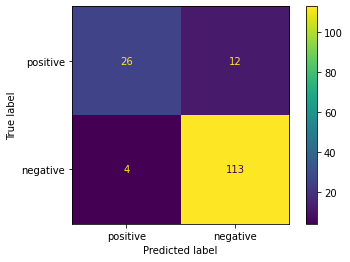

In [ ]:
# plot confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['positive','negative'])
cmd.plot()

In [ ]:
# classification report
print(classification_report(y_test, y_pred_cv))

# accuracy score
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred_cv)))

              precision    recall  f1-score   support

    negative       0.87      0.68      0.76        38
    positive       0.90      0.97      0.93       117

    accuracy                           0.90       155
   macro avg       0.89      0.83      0.85       155
weighted avg       0.89      0.90      0.89       155

Accuracy Score: 0.896774193548387


The model is more accurate in predicting positive sentiment as seen in the classification report.


*   Positive precision is 0.13 higher than negative precision.
*   Positive recall is 0.29 higher than negative recall.
*   Positive f1-score is 0.17 higher than negative f1-score.


*   Metrics for positive are in the range of 0.90 to 0.97.
*   Metrics for negative are in the range of 0.68 to 0.87.


It is overall a good model as all metrics are above 0.65 which is very near to 1.0, indicating that almost all values retrieved were relevant, and almost all the relevant values were retrieved.

The model also has an accuracy score of 0.897 which indicates a high accuracy as it is less than 0.1 lower than 0.90.

----
###**naive bayes with CountVectorizer**

In [ ]:
# fit term frequency matrix to naive bayes model

nb.fit(x_train_cv.toarray(), y_train)
y_pred_cv = nb.predict(x_test_cv.toarray())

print(list(y_test[:10]))
print(list(y_pred_cv[:10]))

['negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive']
['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative']


####evaluate model - naive bayes

In [ ]:
# display confusion matrix

cm = confusion_matrix(y_test, y_pred_cv)
cm

array([[ 25,  13],
       [  7, 110]])

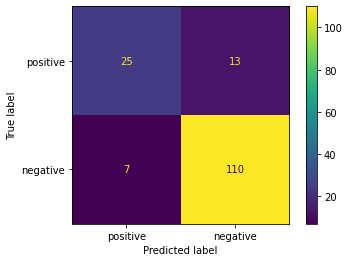

In [ ]:
# plot confusion matrix

cmd = ConfusionMatrixDisplay(cm, display_labels=['positive','negative'])
cmd.plot()

In [ ]:
# classification report
print(classification_report(y_test, y_pred_cv))

# accuracy score
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred_cv)))

              precision    recall  f1-score   support

    negative       0.78      0.66      0.71        38
    positive       0.89      0.94      0.92       117

    accuracy                           0.87       155
   macro avg       0.84      0.80      0.82       155
weighted avg       0.87      0.87      0.87       155

Accuracy Score: 0.8709677419354839


The model is more accurate in predicting positive sentiment as seen in the classification report.


*   Positive precision is 0.11 higher than negative precision.
*   Positive recall is 0.18 higher than negative recall.
*   Positive f1-score is 0.21 higher than negative f1-score.


*   Metrics for positive are in the range of 0.89 to 0.94.
*   Metrics for negative are in the range of 0.66 to 0.78.



It is overall an good model as the precision and recall are within 0.66 to 0.94 which would return a high number of relevant results. 

The accuracy score of 0.871 also shows that it is an good performing model, meaning that 87.1% of predictions made were correct.

----
###**logistic regression with TF-IDF**

In [ ]:
# fit TF-IDF matrix on logistic regression model

lr.fit(x_train_tfidf, y_train)
y_pred_tfidf = lr.predict(x_test_tfidf)

print(list(y_test[:10]))
print(list(y_pred_tfidf[:10]))

['negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive']
['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive']


####evaluate model - logistic regression

In [ ]:
# display confusion matrix

cm = confusion_matrix(y_test, y_pred_tfidf)
cm

array([[  5,  33],
       [  0, 117]])

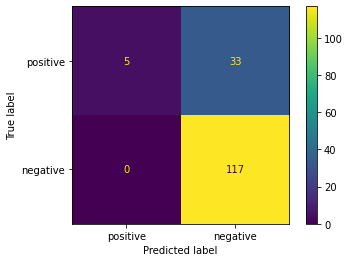

In [ ]:
# plot confusion matrix

cmd = ConfusionMatrixDisplay(cm, display_labels=['positive','negative'])
cmd.plot()

In [ ]:
# classification report
print(classification_report(y_test, y_pred_tfidf))

# accuracy score
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred_tfidf)))

              precision    recall  f1-score   support

    negative       1.00      0.13      0.23        38
    positive       0.78      1.00      0.88       117

    accuracy                           0.79       155
   macro avg       0.89      0.57      0.55       155
weighted avg       0.83      0.79      0.72       155

Accuracy Score: 0.7870967741935484


The model is overall more accurate in predicting positive sentiment as seen from the recall and f1-score.


*   Negative precision is 0.22 higher than positive precision.
*   Positive recall is 0.87 higher than negative recall.
*   Positive f1-score is 0.65 higher than negative f1-score.


*   Metrics for positive are in the range of 0.78 to 1.00.
*   Metrics for negative are in the range of 0.13 to 1.00.


It is overall an bad model as the regative recall is 0.13, meaning that only 8% of the positive results are true positives.

The accuracy score of 0.787 also shows that the model is not very accurate in the prediction, where only 78.7% of predictions made were correct.


# ----
###**naive bayes with TF-IDF**

In [ ]:
# fit TF-IDF matric on naive bayes model

nb.fit(x_train_tfidf, y_train)
y_pred_tfidf = nb.predict(x_test_tfidf)

print(list(y_test[:10]))
print(list(y_pred_tfidf[:10]))

['negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive']
['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative']


####evaluate model - naive bayes

In [ ]:
# display confusion matrix

cm = confusion_matrix(y_test, y_pred_tfidf)
cm

array([[ 22,  16],
       [  7, 110]])

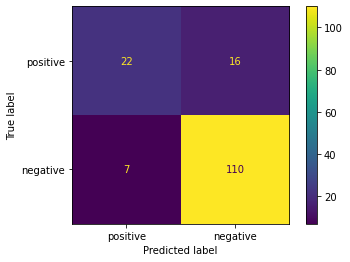

In [ ]:
# plot confusion matrix

cmd = ConfusionMatrixDisplay(cm, display_labels=['positive','negative'])
cmd.plot()

In [ ]:
# classification report
print(classification_report(y_test, y_pred_tfidf))

# accuracy score
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred_tfidf)))

              precision    recall  f1-score   support

    negative       0.76      0.58      0.66        38
    positive       0.87      0.94      0.91       117

    accuracy                           0.85       155
   macro avg       0.82      0.76      0.78       155
weighted avg       0.84      0.85      0.84       155

Accuracy Score: 0.8516129032258064


The model is more accurate in predicting positive sentiment as seen in the classification report.


*   Positive precision is 0.11 higher than negative precision.
*   Positive recall is 0.36 higher than negative recall.
*   Positive f1-score is 0.25 higher than negative f1-score.


*   Metrics for positive are in the range of 0.87 to 0.94.
*   Metrics for negative are in the range of 0.58 to 0.76.


It is overall an average model as the precision and recall are within 0.58 to 0.94 which would not return high number of relevant results.

This can also be seen in the accuracy score of 0.852, 85.2%, where it is above 0.80 but far from 0.90. Hence I conclude that the model is not a good model as it does not have an accuracy near to 90%.

----
## **Conclusion**
In summary, 
 

*   Best performing model = logisitic regression with count vectorizer, ngrams range is 1 to 2, and max features = 7000
*   Worst performing model = logistic regresion with TF-IDF, ngrams range is 1 to 2, and max features = 7000




*   Models that used Count Vectorizer, a matrix of documents and absolute term frequency, performed better than models that used TF-IDF as features.

*   The Naive Bayes models performed similarly when using term frequency and TF-IDF. This is seen where there is only a difference of 0.019 in the two models' accuracy score.


*   All models performed better in predicting positive reviews.

*   There is an imbalance in the number of positive and negative reviews, where the number of positive reviews is more than two times the number of negative reviews. 
*   This could be the cause of all models performing better in predicting positives. Hence, an increase in negative reviews could lead to more accurate prediction in the models.





